In [2]:
# This code explores the NBA players from the 2013-14 season, it uses a machine learning algorithm called kMneas to group the players in clusters. 
# This will show which players are most similar

wassip


In [3]:
# Import packages/libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Load data
#from google.colab import files
#uploaded = files.upload()
nba = pd.read_csv('nba_2022.csv')
nba.head(7)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,1725,265,603,...,0.595,146,327,473,82,37,41,84,151,664
1,2,Steven Adams,C,28,MEM,76,75,1999,210,384,...,0.543,349,411,760,256,65,60,115,153,528
2,3,Bam Adebayo,C,24,MIA,56,56,1825,406,729,...,0.753,137,427,564,190,80,44,148,171,1068
3,4,Santi Aldama,PF,21,MEM,32,0,360,53,132,...,0.625,33,54,87,21,6,10,16,36,132
4,5,LaMarcus Aldridge,C,36,BRK,47,12,1050,252,458,...,0.873,73,185,258,42,14,47,44,78,607
5,6,Nickeil Alexander-Walker,SG,23,TOT,65,21,1466,253,680,...,0.743,37,150,187,156,46,23,93,103,692
6,6,Nickeil Alexander-Walker,SG,23,NOP,50,19,1317,237,632,...,0.722,36,128,164,139,41,19,85,88,639


In [7]:
#Get the number of rows and columns in data set (500 players, 30 stats)
nba.shape

(500, 30)

In [8]:
#Find average value for each numeric column
nba.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Rk      189.118000
Age      26.158000
G        37.320000
GS       17.648000
MP      849.176000
FG      142.252000
FGA     309.088000
FG%       0.433403
3P       44.022000
3PA     124.442000
3P%       0.300712
2P       98.230000
2PA     184.646000
2P%       0.505147
eFG%      0.496340
FT       60.702000
FTA      77.934000
FT%       0.753454
ORB      35.440000
DRB     120.594000
TRB     156.034000
AST      85.528000
STL      26.384000
BLK      16.416000
TOV      45.586000
PF       67.954000
PTS     389.228000
dtype: float64

In [15]:
# Get the mean of specific column
nba.loc[:,'FG'].mean()

142.252

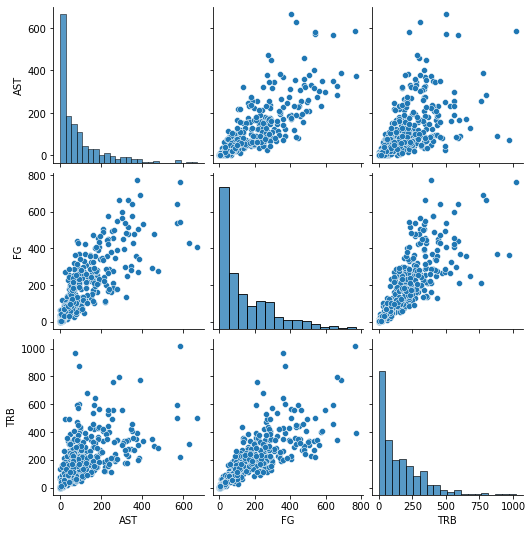

In [16]:
# Make a pairwise scatterplot
sns.pairplot(nba[["AST", "FG", "TRB"]])

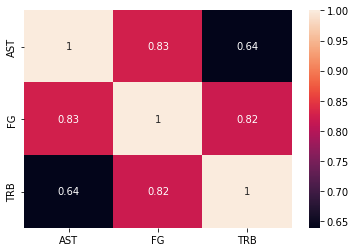

In [19]:
#Make heatmap to see correlations
correlation = nba[["AST", "FG", "TRB"]].corr()
sns.heatmap(correlation, annot=True)

In [20]:
# Make cluster of players using kMeans
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1) # Creating kMeans model with 5 clusters
good_columns = nba._get_numeric_data().dropna(axis=1) # get numeric data and remove columns with missing data
kmeans_model.fit(good_columns) # Train the columns
labels = kmeans_model.labels_ # Get labels or (cluster label for each player)
labels

array([3, 3, 3, 4, 2, 3, 2, 0, 3, 3, 4, 0, 0, 0, 2, 1, 4, 3, 1, 3, 0, 4,
       4, 4, 0, 3, 0, 3, 0, 2, 4, 4, 1, 2, 3, 1, 4, 0, 1, 1, 1, 1, 0, 0,
       2, 2, 4, 3, 3, 3, 0, 2, 4, 0, 4, 4, 0, 2, 1, 4, 4, 4, 2, 2, 0, 3,
       1, 0, 0, 0, 1, 4, 3, 0, 2, 4, 4, 1, 1, 3, 2, 4, 4, 0, 2, 3, 0, 0,
       0, 0, 0, 0, 4, 1, 4, 0, 0, 4, 2, 1, 4, 0, 3, 4, 3, 4, 1, 0, 3, 2,
       0, 0, 3, 0, 0, 0, 4, 4, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 2,
       1, 2, 2, 3, 4, 0, 3, 3, 0, 0, 0, 4, 0, 4, 3, 2, 4, 2, 2, 4, 3, 0,
       0, 1, 3, 3, 4, 1, 3, 0, 4, 0, 2, 0, 0, 1, 0, 0, 2, 4, 3, 2, 4, 2,
       0, 4, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 2, 2, 4, 3, 0, 0,
       1, 0, 1, 0, 4, 0, 2, 4, 1, 0, 0, 0, 0, 2, 4, 4, 0, 4, 0, 0, 0, 3,
       0, 0, 0, 4, 2, 4, 4, 0, 4, 1, 1, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 2,
       3, 0, 0, 0, 1, 0, 0, 4, 2, 2, 4, 3, 1, 4, 0, 3, 4, 0, 1, 3, 3, 3,
       0, 2, 2, 1, 2, 2, 3, 2, 2, 4, 0, 2, 1, 3, 2, 0, 2, 2, 1, 3, 4, 4,
       0, 3, 2, 4, 3, 4, 1, 0, 3, 2, 4, 2, 0, 0, 2,

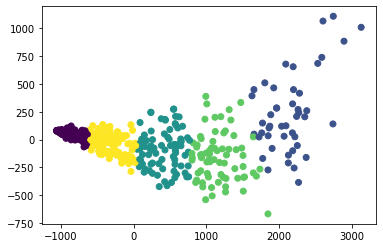

In [22]:
# Plot players by cluster
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1], c=labels)
plt.show()

In [28]:
# Find Bron in data
LeBron = good_columns.loc[nba['Player'] == 'LeBron James',:]

# Find KD in data
KD = good_columns.loc[nba['Player'] == 'Kevin Durant',:]

#print them
print(LeBron)
print(KD)

      Rk  Age   G  GS    MP   FG   FGA   3P  3PA   2P  ...  FTA  ORB  DRB  \
368  274   37  56  56  2084  640  1221  161  448  479  ...  336   63  396   

     TRB  AST  STL  BLK  TOV   PF   PTS  
368  459  349   73   59  196  121  1695  

[1 rows x 22 columns]
      Rk  Age   G  GS    MP   FG   FGA   3P  3PA   2P  ...  FTA  ORB  DRB  \
198  154   33  55  55  2047  578  1115  115  300  463  ...  409   29  378   

     TRB  AST  STL  BLK  TOV   PF   PTS  
198  407  351   48   52  191  113  1643  

[1 rows x 22 columns]


In [33]:
#Converting data into lists for model prediction
LeBron_list = LeBron.values.tolist()
KD_list = KD.values.tolist()

#What clusters are Bron and KD in?
LeBron_cluster = kmeans_model.predict(LeBron_list) #Bron belongs to cluster 1
KD_cluster = kmeans_model.predict(KD_list) #So does KD

#print cluster label
print(LeBron_cluster)
print(KD_cluster)

[1]
[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [37]:
totalcorr = nba.corr()
totalcorr


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,1.000000,-0.007624,-0.117544,-0.132698,-0.118723,-0.114426,-0.115833,-0.053700,-0.075325,-0.082499,...,0.039526,-0.153884,-0.147207,-0.154865,-0.072989,-0.150617,-0.106209,-0.107190,-0.119641,-0.110979
Age,-0.007624,1.000000,0.076843,0.081211,0.099040,0.067248,0.062409,0.092908,0.123381,0.109845,...,0.116272,0.047821,0.103484,0.092958,0.085385,0.062063,0.080261,0.064509,0.092506,0.080258
G,-0.117544,0.076843,1.000000,0.686436,0.903642,0.783105,0.789075,0.291749,0.692113,0.710170,...,0.150248,0.645632,0.785181,0.779859,0.642837,0.809799,0.626713,0.708434,0.890247,0.776351
GS,-0.132698,0.081211,0.686436,1.000000,0.878360,0.855283,0.850230,0.207507,0.698544,0.705144,...,0.150961,0.559452,0.782923,0.755390,0.757260,0.793602,0.598592,0.801421,0.778440,0.851527
MP,-0.118723,0.099040,0.903642,0.878360,1.000000,0.931659,0.939038,0.237512,0.819996,0.833547,...,0.212778,0.611888,0.859948,0.829020,0.804158,0.898069,0.632219,0.855072,0.902946,0.930268
FG,-0.114426,0.067248,0.783105,0.855283,0.931659,1.000000,0.986094,0.253566,0.775141,0.788468,...,0.197702,0.577471,0.859874,0.819891,0.825730,0.821675,0.606374,0.910008,0.825299,0.994777
FGA,-0.115833,0.062409,0.789075,0.850230,0.939038,0.986094,1.000000,0.188236,0.844231,0.862315,...,0.232576,0.502542,0.820562,0.769616,0.840515,0.834394,0.550055,0.913191,0.816718,0.989633
FG%,-0.053700,0.092908,0.291749,0.207507,0.237512,0.253566,0.188236,1.000000,0.032460,0.021820,...,-0.170722,0.388809,0.312241,0.345169,0.134365,0.187237,0.334925,0.200352,0.299061,0.228942
3P,-0.075325,0.123381,0.692113,0.698544,0.819996,0.775141,0.844231,0.032460,1.000000,0.991959,...,0.307144,0.206759,0.581238,0.505820,0.693463,0.734327,0.306323,0.714486,0.652089,0.802581
3PA,-0.082499,0.109845,0.710170,0.705144,0.833547,0.788468,0.862315,0.021820,0.991959,1.000000,...,0.305955,0.224996,0.601472,0.526338,0.709005,0.746581,0.329013,0.738107,0.673329,0.816113


In [38]:
#Split data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nba[['FG']],nba[['AST']], test_size=0.2, random_state=2)

In [39]:
# Predict number of assists per player from the field goals made
#Create linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train) #training the model
prediction = lr.predict(x_test) #make predictions on test data

print(prediction) # Print predictions
print(y_test) # Print actual values

[[130.74896047]
 [102.58905326]
 [ 47.4186228 ]
 [ 57.18838652]
 [ 75.57853001]
 [ 10.63833582]
 [122.70327269]
 [ 78.45198993]
 [  2.01795606]
 [ 69.83161017]
 [ 64.65938231]
 [ 12.93710376]
 [  8.33956789]
 [167.52924744]
 [  3.16734003]
 [334.18992279]
 [ 42.82108692]
 [152.58725586]
 [ 28.45378732]
 [ 24.43094344]
 [  2.01795606]
 [  7.7648759 ]
 [ 74.42914604]
 [  8.33956789]
 [198.56261458]
 [ 32.47663121]
 [207.18299434]
 [ 87.07236969]
 [119.25512079]
 [  5.46610797]
 [ 46.26923883]
 [ 50.29208271]
 [369.8208258 ]
 [ 75.57853001]
 [  5.46610797]
 [ 70.40630215]
 [ 69.83161017]
 [106.03720516]
 [  6.04079995]
 [289.93864003]
 [  6.04079995]
 [ 24.43094344]
 [  3.16734003]
 [132.47303642]
 [ 36.4994751 ]
 [161.7823276 ]
 [  4.316724  ]
 [  2.59264805]
 [  3.74203201]
 [162.35701959]
 [ 19.83340756]
 [ 34.20070716]
 [  2.01795606]
 [  9.48895185]
 [ 42.24639494]
 [ 16.95994764]
 [311.20224344]
 [ 10.63833582]
 [125.57673261]
 [  3.74203201]
 [160.63294364]
 [156.03540777]
 [248.56

In [40]:
# Test model: Score returns coefficient of determination R^2 of prediction
lr_confidence = lr.score(x_test, y_test)
print("lr_confidence: ", lr_confidence)

lr_confidence:  0.6512126458284531
